In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pickle
#from scipy import stats
from scipy import spatial
from scipy.spatial import distance
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats
import scipy.stats as st
import os

In [2]:
baseline = np.load('/Users/jenniferthem/Masterthesis_Data/January2020/centroid_dist_baseline.npy',allow_pickle=True)
ket = np.load('/Users/jenniferthem/Masterthesis_Data/January2020/centroid_dist_ketamine.npy',allow_pickle=True)
placebo = np.load('/Users/jenniferthem/Masterthesis_Data/January2020/centroid_dist_placebo.npy',allow_pickle=True)

In [3]:
UMAP_ROI_p = np.load('/Users/jenniferthem/Masterthesis_Data/2020-01-results-B-P-K/UMAP_ROI_Placebo', allow_pickle=True)
UMAP_ROI_k = np.load('/Users/jenniferthem/Masterthesis_Data/2020-01-results-B-P-K/UMAP_ROI_Ketamine', allow_pickle=True)
UMAP_ROI_b = np.load('/Users/jenniferthem/Masterthesis_Data/2020-01-results-B-P-K/UMAP_ROI_Baseline', allow_pickle=True)

In [29]:
# split baseline
b_k = np.load('/Users/jenniferthem/Masterthesis_Data/January2020/centroid_dist_baseline_ketamine.npy', allow_pickle=True)
b_p = np.load('/Users/jenniferthem/Masterthesis_Data/January2020/centroid_dist_baseline_placebo.npy', allow_pickle=True)
UMAP_ROI_b_p = np.load('/Users/jenniferthem/Masterthesis_Data/UMAP_ROI_Baseline_placebo',allow_pickle=True)
UMAP_ROI_b_k = np.load('/Users/jenniferthem/Masterthesis_Data/UMAP_ROI_Baseline_ketamine',allow_pickle=True)

In [12]:
UMAP_ROI_b_p

,x,y,ROI
0,-0.786242,-3.333865,OFC1
1,-0.268083,-7.063679,OFC1
2,0.862786,-3.778643,OFC1
3,1.124181,-4.238885,OFC1
4,1.223943,-4.288257,OFC1
...,...,...,...
11878,-0.693440,1.147223,Caudate
11879,-0.792007,1.120653,Caudate
11880,-0.811245,1.154001,Caudate
11881,-0.769495,1.179527,Caudate


In [14]:
UMAP_ROI_b_k

,x,y,ROI
0,1.369980,-3.901125,OFC1
1,1.376531,-2.992676,OFC1
2,1.349034,-3.596414,OFC1
3,0.725392,-4.002450,OFC1
4,0.583663,-3.994861,OFC1
...,...,...,...
11878,0.045164,3.499945,Caudate
11879,0.034704,3.490495,Caudate
11880,-0.009128,3.505677,Caudate
11881,0.054657,3.502581,Caudate


In [4]:
baseline

array([[0.4866106966867624, 'OFC1'],
       [0.3439953834806624, 'OFC1'],
       [0.45692236090264726, 'OFC1'],
       ...,
       [1.234745149192686, 'Caudate'],
       [1.2869033663893823, 'Caudate'],
       [1.2470138517142697, 'Caudate']], dtype=object)

In [15]:
b_df = pd.DataFrame(baseline)
k_df = pd.DataFrame(ket)
p_df = pd.DataFrame(placebo)
b_df.columns=['Distance', 'ROI']
k_df.columns=['Distance', 'ROI']
p_df.columns=['Distance', 'ROI']

In [16]:
keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']

In [17]:
keys[1]

'OFC2'

In [18]:
dict_ofc1 = {}
dict_ofc2 = {}
dict_ofc3 = {}
dict_ofc4 = {}
dict_ofc5 = {}
dict_ofc6 = {}
dict_ofc7 = {}
dict_fp2 = {}
dict_25 = {}
dict_s24 = {}
dict_33 = {}
dict_p32 = {}
dict_p24ab = {}
dict_p24c = {}
dict_putamen = {}
dict_nacc = {}
dict_caudate = {}

In [19]:
# list containing dictionaries of the rois
list_dicts = [dict_ofc1,dict_ofc2,dict_ofc3,dict_ofc4,dict_ofc5,dict_ofc6,dict_ofc7,dict_fp2,dict_25,dict_s24,dict_33,dict_p32,dict_p24ab,dict_p24c,dict_putamen,dict_nacc,dict_caudate]



In [40]:
baseline[1][1]

'OFC1'

Centroids of each ROI for each condition

In [20]:
b_split_df = UMAP_ROI_b.groupby('ROI')
# arithmetic mean values for all ROIs used as centroids of the ROIs
b_ROI_mean = b_split_df.mean()
b_ROI_mean
k_split_df = UMAP_ROI_k.groupby('ROI')
# arithmetic mean values for all ROIs used as centroids of the ROIs
k_ROI_mean = k_split_df.mean()
k_ROI_mean
p_split_df = UMAP_ROI_p.groupby('ROI')
p_ROI_mean = p_split_df.mean()

com = pd.concat([b_ROI_mean, k_ROI_mean,p_ROI_mean], axis=1)

In [21]:
p_ROI_mean.columns = ['ROI', 'x', 'y']

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

Scatterplot for these

In [24]:
colors18 = ['#ED1D0C','#808000', '#FA8072', '#7DDCAC', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']

In [25]:
b_ROI_mean_dict = b_ROI_mean.to_dict()
k_ROI_mean_dict = k_ROI_mean.to_dict()
p_ROI_mean_dict = p_ROI_mean.to_dict()


In [107]:
%matplotlib notebook

plot = sns.scatterplot(x ='x', y= 'y', hue='ROI', data=ROI_mean_dict, palette = colors18, legend = 'full', s=10)
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
plt.title('Baseline', fontsize=18)

ValueError: Could not interpret input 'ROI'

In [22]:
keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']
for k in keys:
    b_df['ROI'] = k
    b_df['centroid_x'] = b_ROI_mean_dict['x'][k]
    b_df['centroid_y'] = b_ROI_mean_dict['y'][k]
    
for n in keys:
    k_df['ROI'] = n
    k_df['centroid_x'] = k_ROI_mean_dict['x'][k]
    k_df['centroid_y'] = k_ROI_mean_dict['y'][k]
    
for m in keys:
    p_df['ROI'] = m
    p_df['centroid_x'] = p_ROI_mean_dict['x'][k]
    p_df['centroid_y'] = p_ROI_mean_dict['y'][k]

NameError: name 'b_ROI_mean_dict' is not defined

In [129]:
b_df

,Distance,ROI,centroid_x,centroid_y
0,0.486611,Caudate,-2.583378,3.576777
1,0.343995,Caudate,-2.583378,3.576777
2,0.456922,Caudate,-2.583378,3.576777
3,0.445926,Caudate,-2.583378,3.576777
4,0.424365,Caudate,-2.583378,3.576777
...,...,...,...,...
11878,1.34151,Caudate,-2.583378,3.576777
11879,1.22443,Caudate,-2.583378,3.576777
11880,1.23475,Caudate,-2.583378,3.576777
11881,1.2869,Caudate,-2.583378,3.576777


In [135]:
 del b_df

In [108]:
ROI_mean_dict

{'x': {'25': -1.5608854293823242,
  '33': -0.11283120512962341,
  'Caudate': 2.5084855556488037,
  'FP2': -1.320753812789917,
  'NAcc': 3.4682211875915527,
  'OFC1': -2.347005605697632,
  'OFC2': -1.8125734329223633,
  'OFC3': -1.9529101848602295,
  'OFC4': -3.3903894424438477,
  'OFC5': -3.2823073863983154,
  'OFC6': -3.540231466293335,
  'OFC7': -3.0315418243408203,
  'Putamen': 5.901504993438721,
  'p24ab': 0.06475251168012619,
  'p24c': -0.007086171768605709,
  'p32': -0.5667229294776917,
  's24': -1.0659900903701782,
  's32': -1.180575966835022},
 'y': {'25': -3.319139003753662,
  '33': -5.385822296142578,
  'Caudate': 3.4404244422912598,
  'FP2': -8.397565841674805,
  'NAcc': 2.746950387954712,
  'OFC1': -3.6161880493164062,
  'OFC2': -3.3711555004119873,
  'OFC3': -2.1148428916931152,
  'OFC4': -0.49228209257125854,
  'OFC5': -0.8366098999977112,
  'OFC6': 0.7919315099716187,
  'OFC7': 0.24194514751434326,
  'Putamen': 2.1579978466033936,
  'p24ab': -8.375446319580078,
  'p24c':

**Split the ROIs**

In [30]:
# goal: for each ROI you have one dict with all conditions and list of distances!
#function: input baseline, ketamin and placebo distances of all voxels, ROI
def create_roi_dict(b_dist, k_dist, p_dist, roi):
    b_list=[]
    k_list=[]
    p_list=[]
    
    roi_dict = {}
    # baseline, ketamine, placebo dictionaries
    for i in range(len(b_dist)):
        if b_dist[i][1]==roi:
            b_list.append(b_dist[i][0])
        if k_dist[i][1]==roi:
            k_list.append(k_dist[i][0])    
        if p_dist[i][1]==roi:
            p_list.append(p_dist[i][0])
    
    
    roi_dict = {'Baseline': b_list,
               'Ketamine': k_list,
               'Placebo': p_list}
    return roi_dict

In [32]:
dict_ofc1 = create_roi_dict(baseline, ket, placebo, 'OFC1')

In [42]:
dict_ofc1 = create_roi_dicts(baseline, ket, placebo, 'OFC1')

In [43]:
len(dict_ofc1['Placebo'])

690

In [44]:
dict_nacc = create_roi_dicts(baseline, ket, placebo, 'NAcc')

In [45]:
len(dict_nacc['Placebo'])

191

In [48]:
np.asarray(dict_nacc['Baseline'])

array([1.81977237, 2.0857291 , 2.24745384, 0.30613419, 0.27031948,
       0.30463475, 0.43779456, 0.91282196, 0.48354493, 1.76930845,
       2.12321258, 2.12781584, 1.9143923 , 0.32389962, 0.29052243,
       0.33946431, 0.19704513, 0.29749724, 0.37815421, 0.33639918,
       0.24276919, 0.2101594 , 0.20805998, 0.25531714, 0.35169618,
       0.53479215, 0.2847753 , 0.28689865, 0.20137274, 6.04287603,
       0.21046465, 0.31046497, 0.33265673, 0.3141296 , 0.27022847,
       0.22044041, 0.27528902, 0.26953339, 0.29900877, 5.99364257,
       0.21833723, 0.25645391, 0.26469229, 1.88556771, 1.95914816,
       0.34039602, 0.29820351, 0.41891374, 0.22978342, 0.33490061,
       0.39320431, 0.29417339, 0.29764573, 0.25814585, 0.16283064,
       0.17183747, 0.2841839 , 0.39960878, 0.82193071, 0.36893146,
       0.262772  , 0.23313797, 0.1118531 , 0.14944338, 0.35237547,
       0.35362401, 0.67577338, 0.37288059, 0.18144421, 0.13056066,
       0.10792711, 6.1194353 , 0.15468493, 0.23566005, 0.32572

In [41]:
def calculate_bootstrap(roi):
    save_name =  'Density_bootstrap_' + str(roi) + '.png'

    # dictionary for the chosen ROI
    roi_dict = create_roi_dict(baseline, ket, placebo, roi)
    # get the distance values as a arrays: 3 different arrays for each condition
    b_arr = np.asarray(roi_dict['Baseline'])
    k_arr = np.asarray(roi_dict['Ketamine'])
    p_arr = np.asarray(roi_dict['Placebo'])

    # Subtract baseline
    dist_k = k_arr - b_arr
    dist_p = p_arr - b_arr
    
    dist = dist_k - dist_p
    
    # Bootstrap
    bsr_k_b = bs.bootstrap(dist_k, stat_func=bs_stats.mean, alpha=0.05, num_iterations=50000, return_distribution=True)
    bsr_p_b = bs.bootstrap(dist_p, stat_func=bs_stats.mean, alpha=0.05, num_iterations=50000, return_distribution=True)
    bsr = bs.bootstrap(dist, stat_func=bs_stats.mean, alpha=0.05, num_iterations=50000, return_distribution=True)
    
    # transfer to combined dataframe
    bsr_k_b_df = pd.DataFrame(bsr_k_b)
    bsr_p_b_df = pd.DataFrame(bsr_p_b)
    bsr_df = pd.DataFrame(bsr)
    bsr_com= pd.concat([bsr_k_b_df, bsr_p_b_df, bsr_df], axis=1)
    bsr_com.columns = ['Ketamine', 'Placebo', 'Ketamine-Placebo']
    
    
    
    %matplotlib notebook
    keys = ['Ketamine', 'Placebo', 'Ketamine-Placebo']
    # distplot: Flexibly plot a univariate distribution of observations - Probability density function
    # Iterate through the five airlines
    for curr_key in keys:
    # Subset to the airline
        subset = bsr_com[curr_key]
    #plt.figure(figsize=(20,10))
    #fig = plt.subplots(figsize=(20,15))
    # Draw the density plot
        sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = curr_key)
    
    # Plot formatting
    #fig.set_size_inches(18.5, 10.5)
    #fig.subplots(figsize=(20,15))
    plt.legend(prop={'size': 8}, title = 'Condition')
    plt.title(str(roi))
    plt.xlabel('Bootstrapped mean')
    plt.ylabel('Probibility density')
    plt.xlim(-5, 5)
    plt.axvline(linewidth=1, linestyle='--')
    plt.savefig(os.path.join('/Users/jenniferthem/Masterthesis_Data/January2020/', save_name), dpi=250)
    
    
    return bsr_com, bsr_k_b, bsr_p_b, bsr
    

<IPython.core.display.Javascript object>


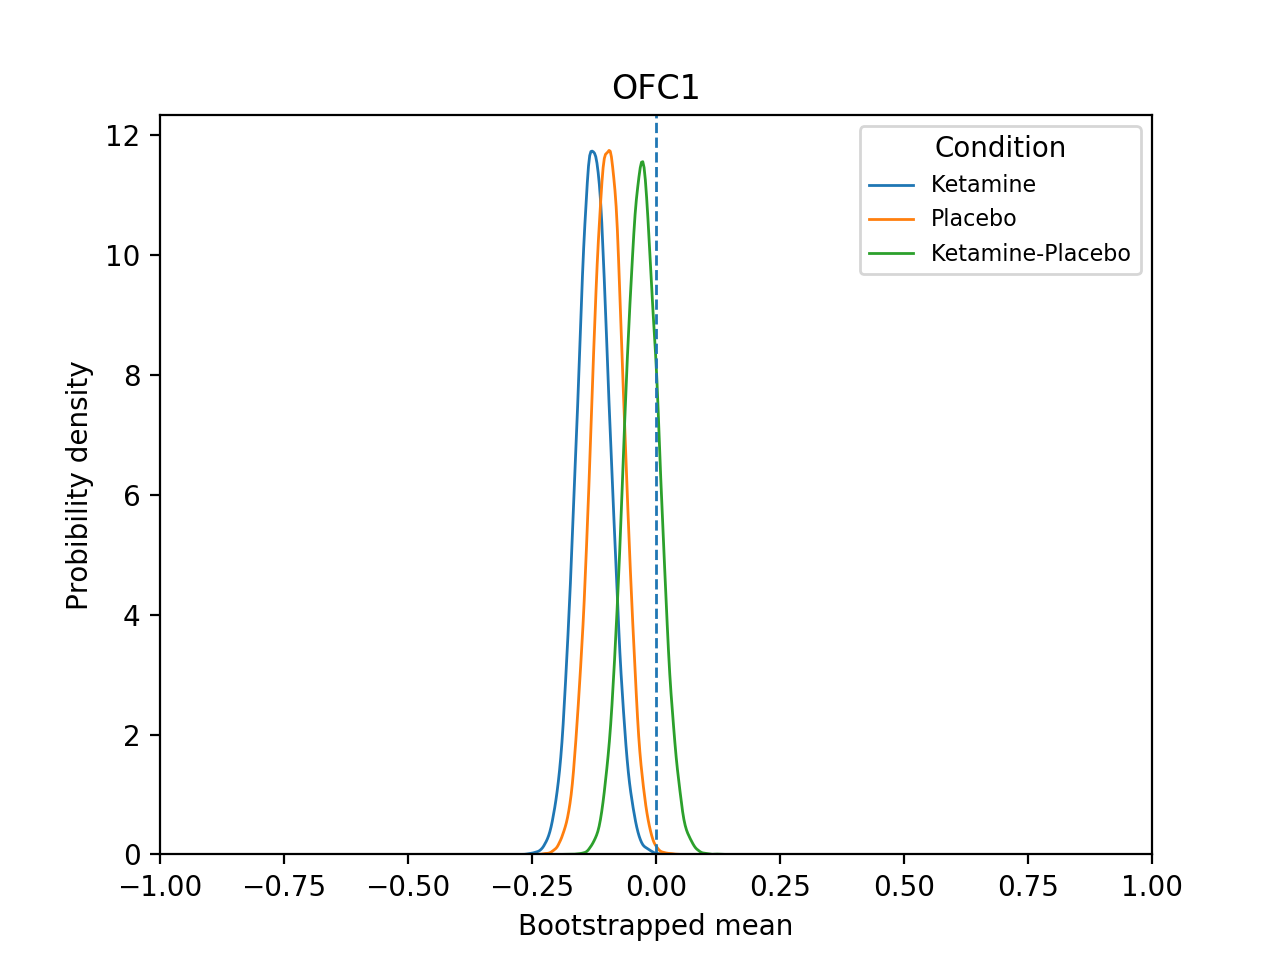

In [36]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('OFC1')

In [142]:
np.mean(bsr_k)

-0.1260864189905158

In [143]:
np.mean(bsr_p)

-0.0974655389713946

In [144]:
len(bsr_k)

50000

In [145]:
len(bsr)

50000

In [146]:
np.mean(bsr)

-0.028412241716287305

**Correct way to calculate the p-value**

In [170]:
sum_mean=0
for i in range(len(bsr)):
    if bsr[i]>0:
        # sum of how many
        sum_mean +=1
    #print('sum:', sum_mean )    
    p_val = 2*(sum_mean/len(bsr))
print(sum_mean)
print(p_val)


50000
2.0


In [153]:
p_val

0.40112

<IPython.core.display.Javascript object>


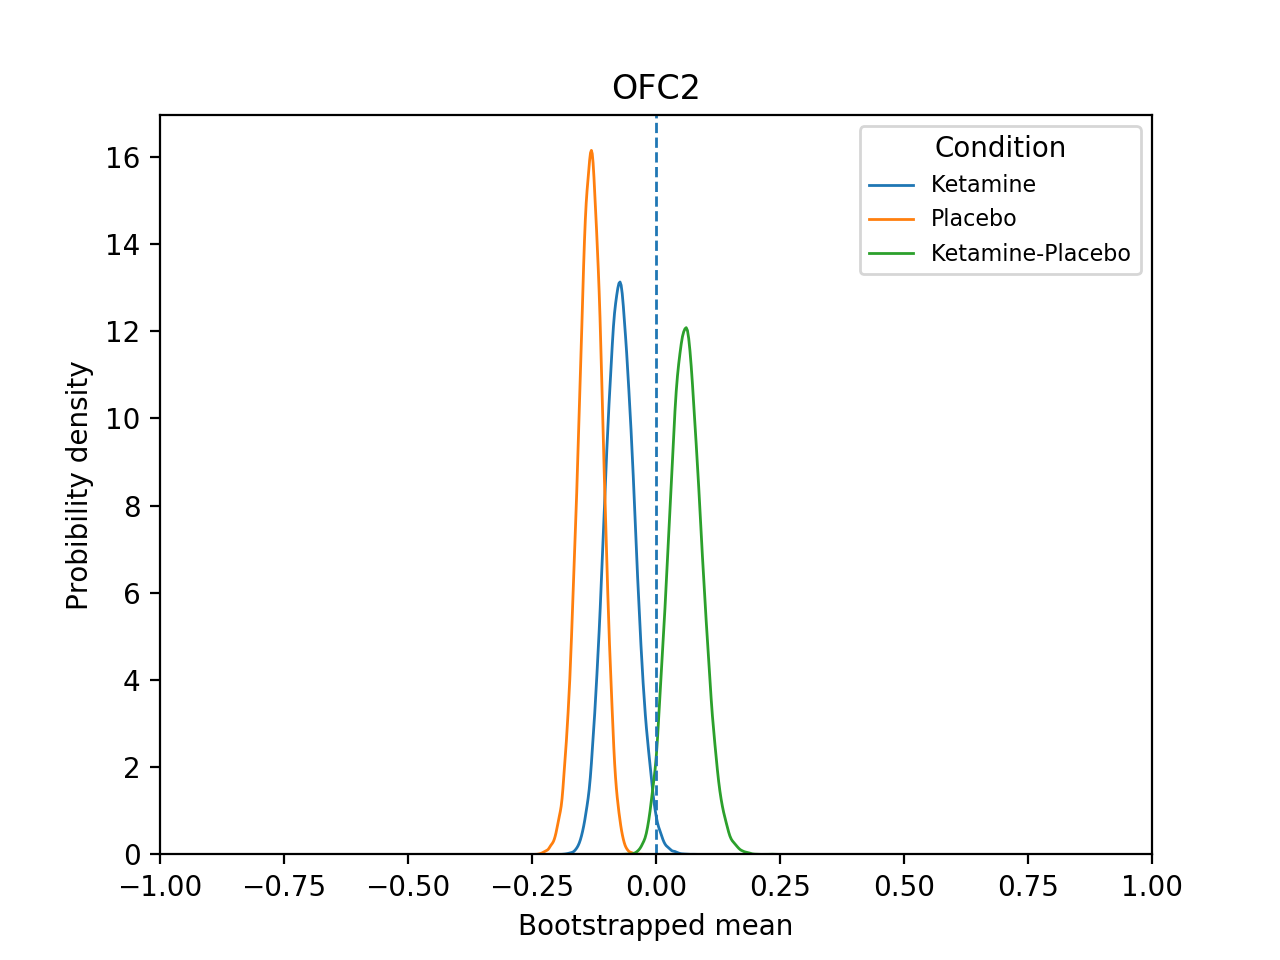

In [37]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('OFC2')

<IPython.core.display.Javascript object>


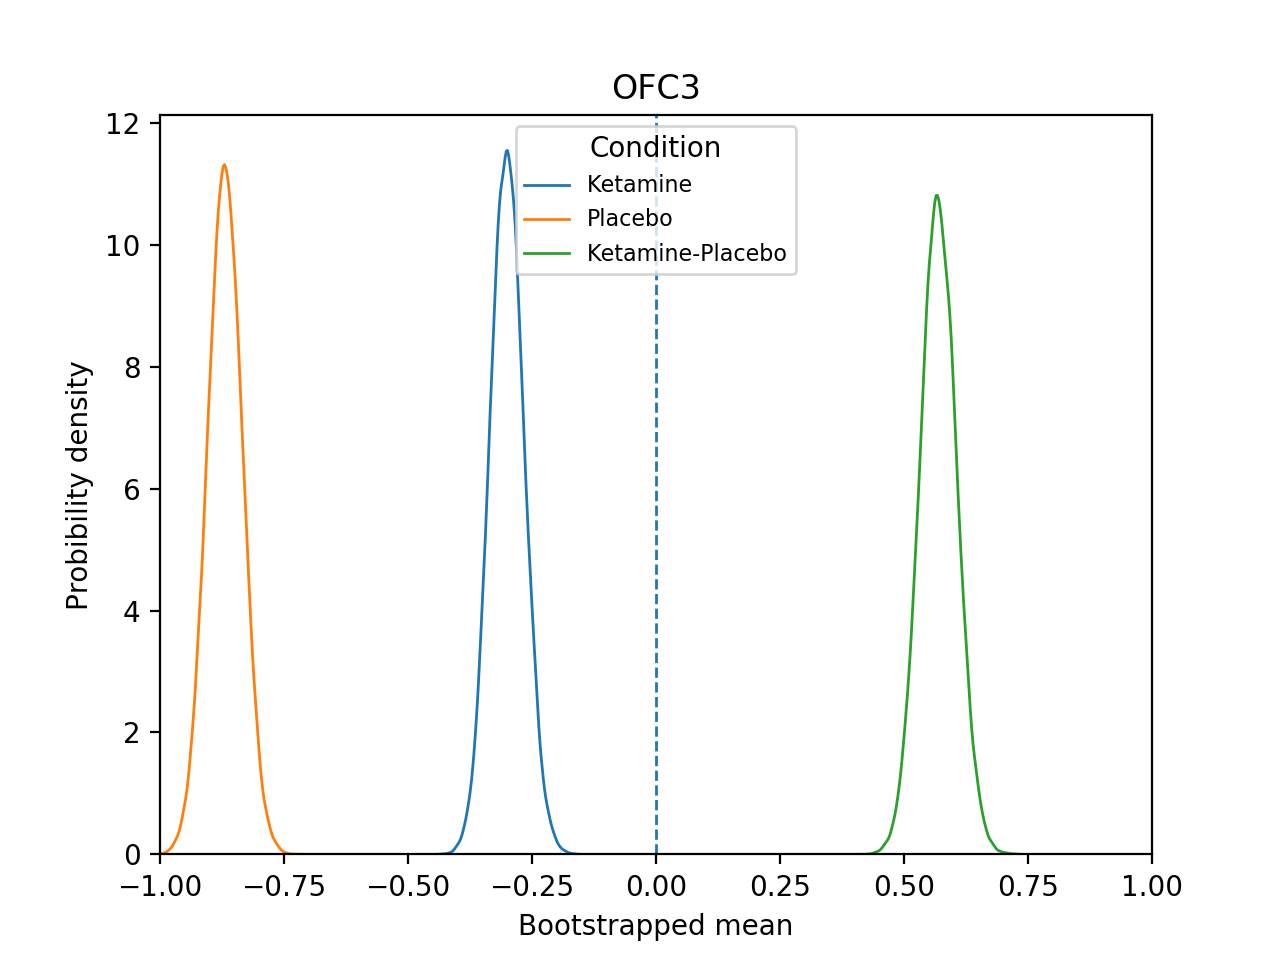

In [38]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('OFC3')

<IPython.core.display.Javascript object>


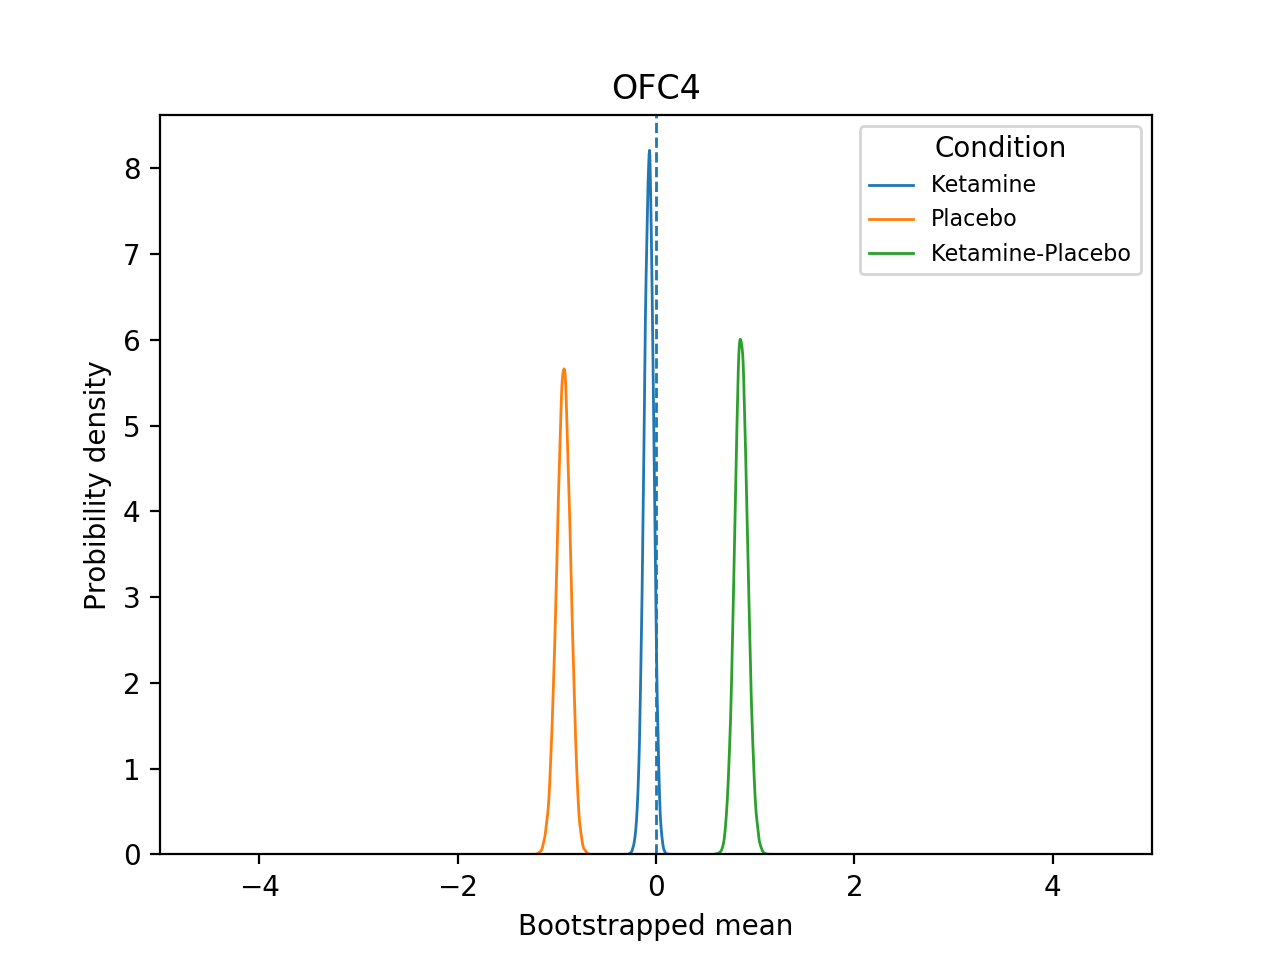

In [43]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('OFC4')

<IPython.core.display.Javascript object>


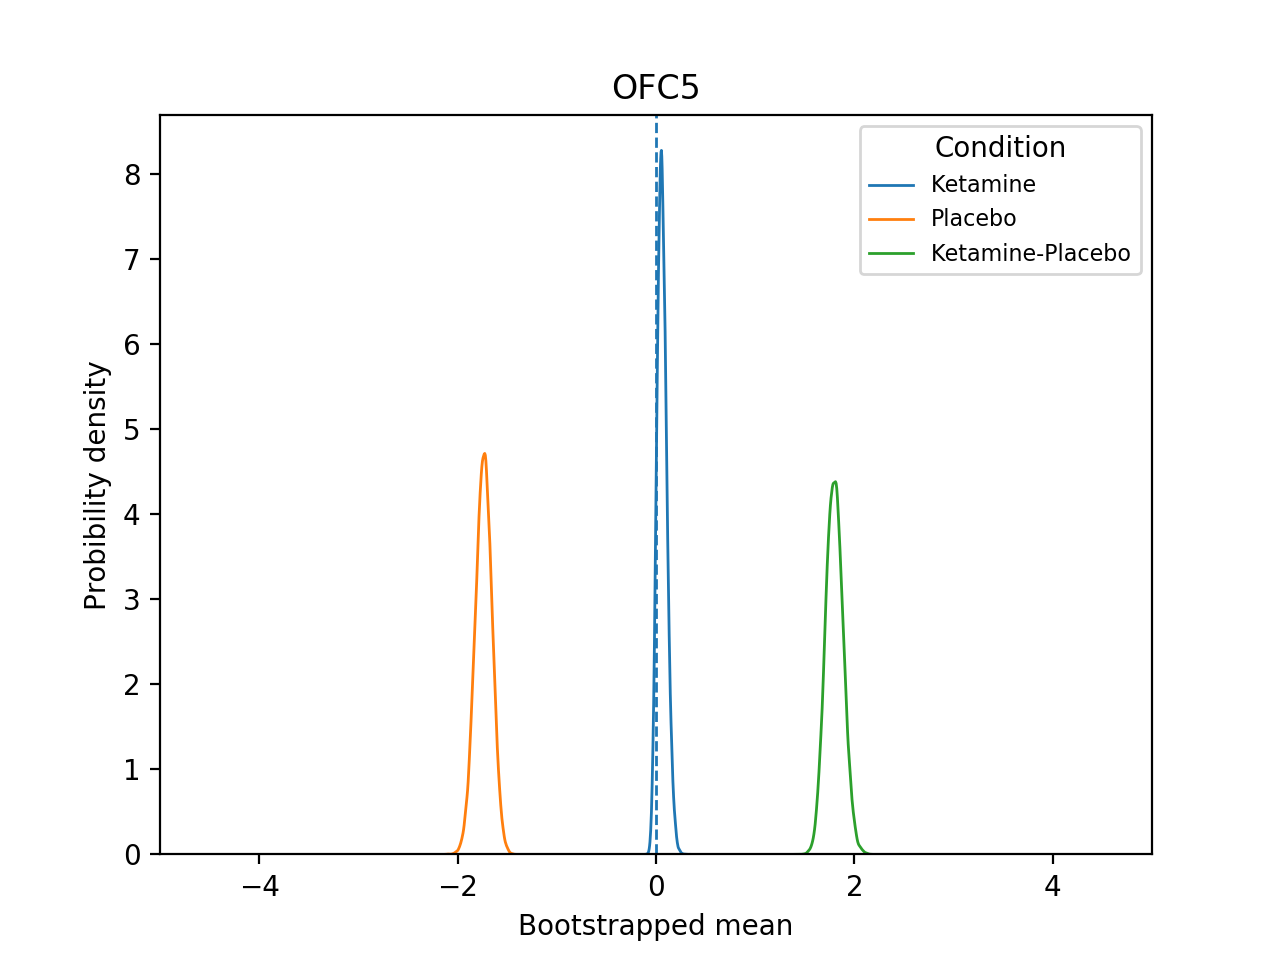

In [42]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('OFC5')

<IPython.core.display.Javascript object>


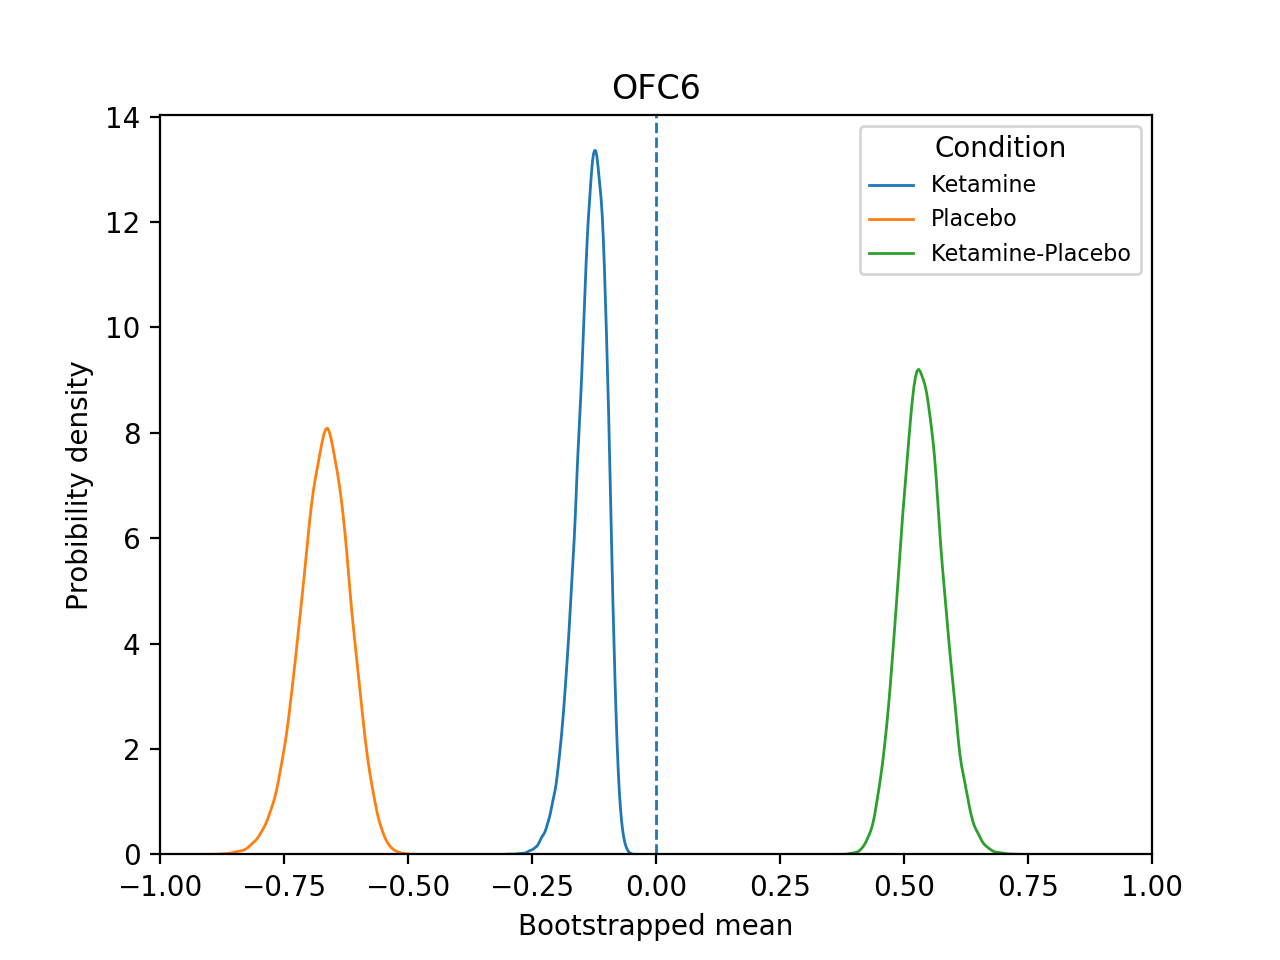

the p-value for Ketamine and placebo is:  0.0


In [87]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('OFC6')

<IPython.core.display.Javascript object>


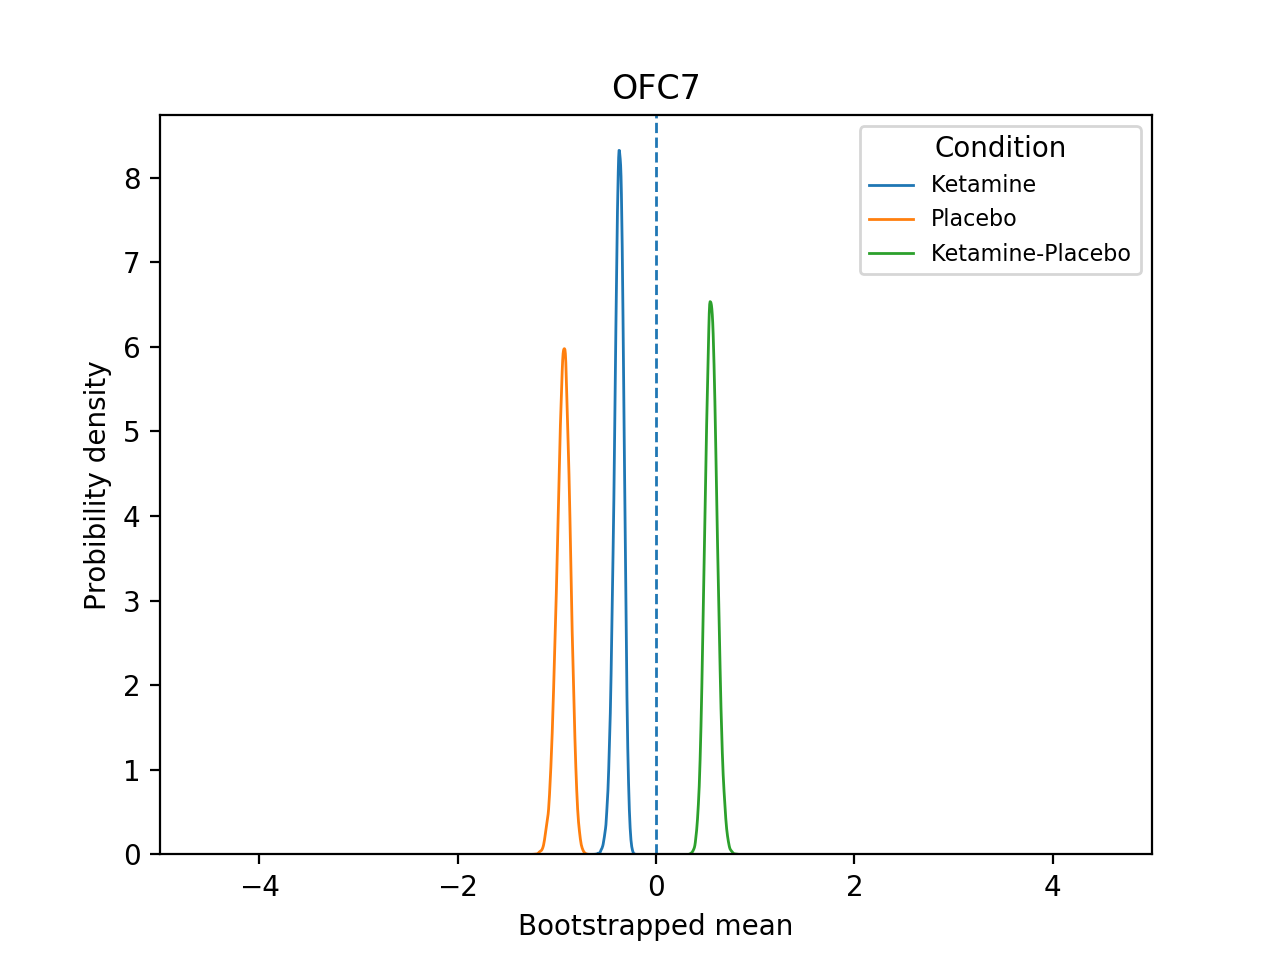

the p-value for Ketamine and placebo is:  0.0


In [113]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('OFC7')

<IPython.core.display.Javascript object>


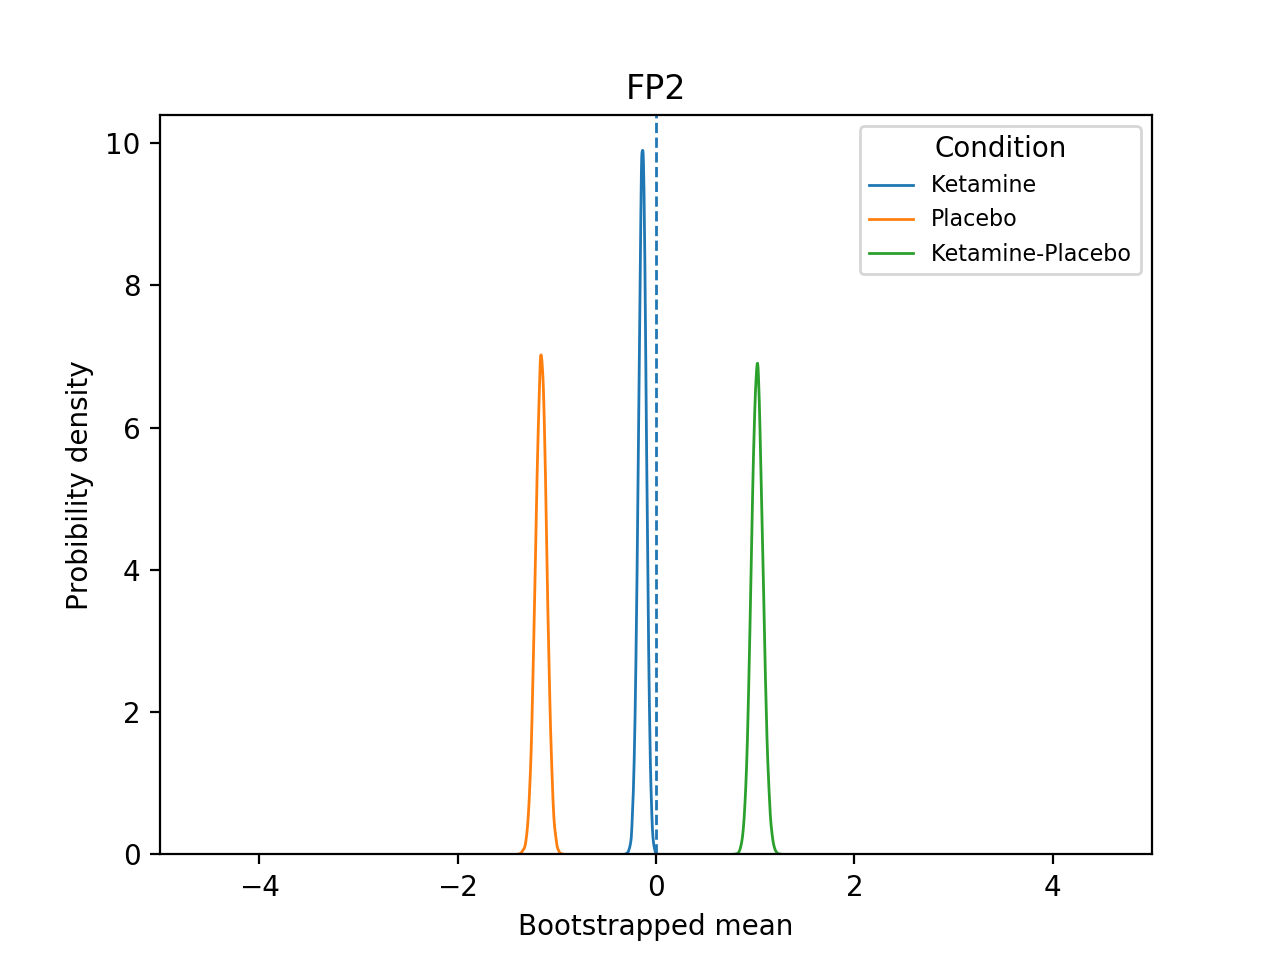

the p-value for Ketamine and placebo is:  0.0


In [114]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('FP2')

<IPython.core.display.Javascript object>


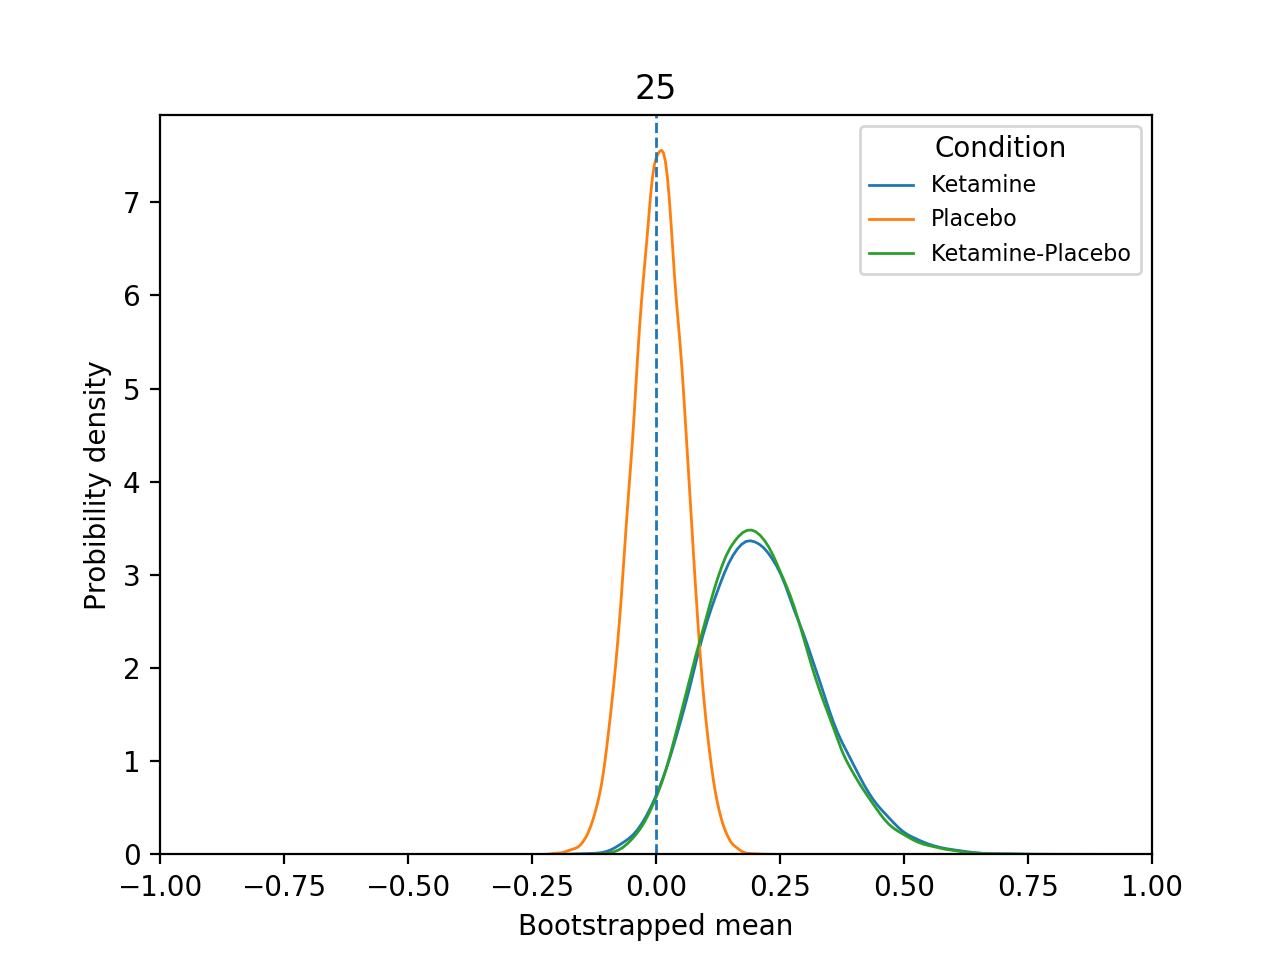

the p-value for Ketamine and placebo is:  0.0


In [164]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('25')

In [165]:
np.amin(bsr)

-0.12907514700683015

In [166]:
sum_mean=0
for i in range(len(bsr)):
    if bsr[i]<0:
        # sum of how many
        sum_mean +=1
    #print('sum:', sum_mean )    
    p_val = 2*(sum_mean/len(bsr))
print(sum_mean)
print(p_val)

972
0.03888


<IPython.core.display.Javascript object>


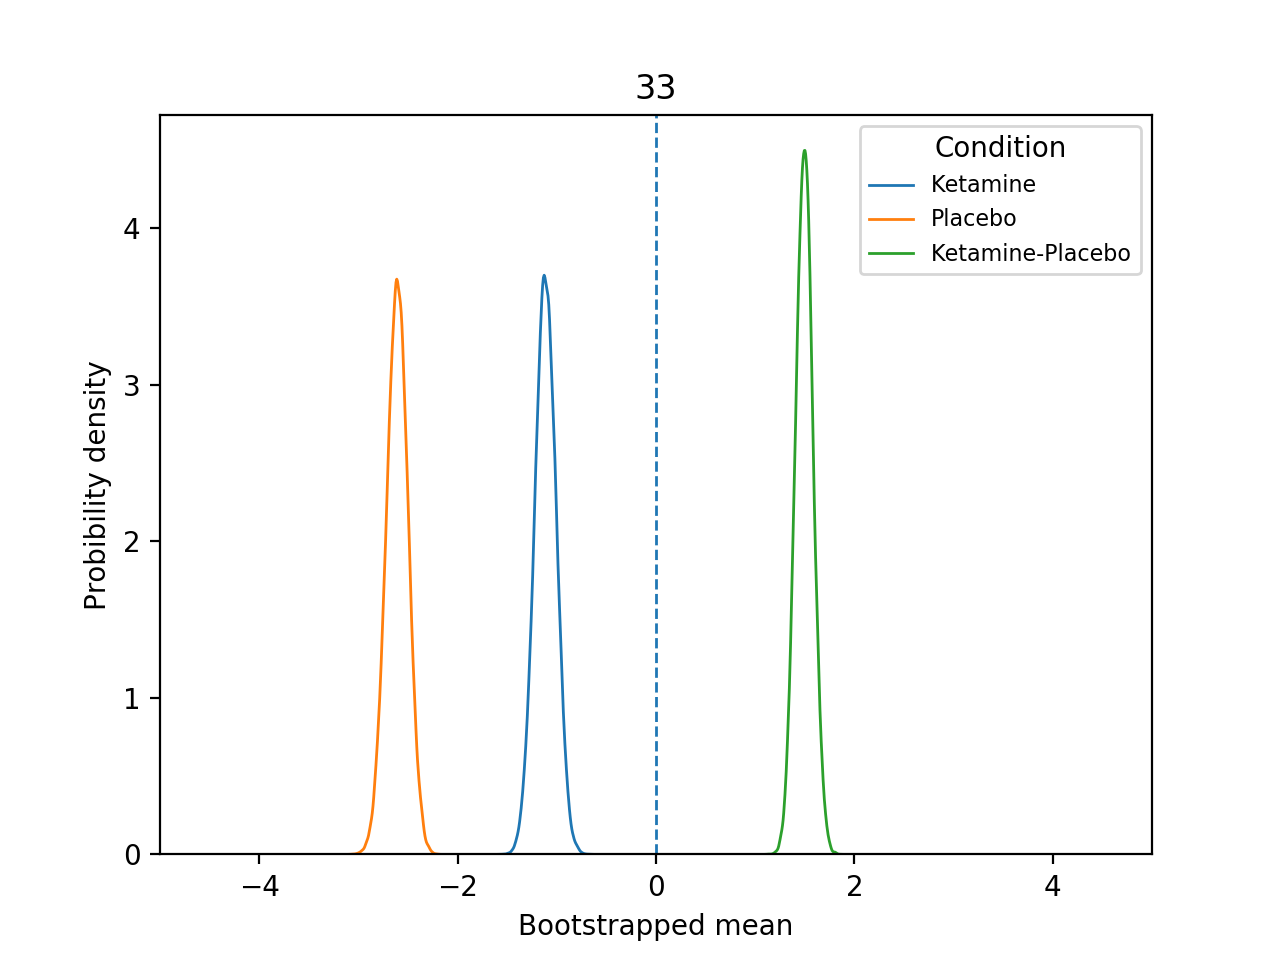

the p-value for Ketamine and placebo is:  0.0


In [168]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('33')

<IPython.core.display.Javascript object>


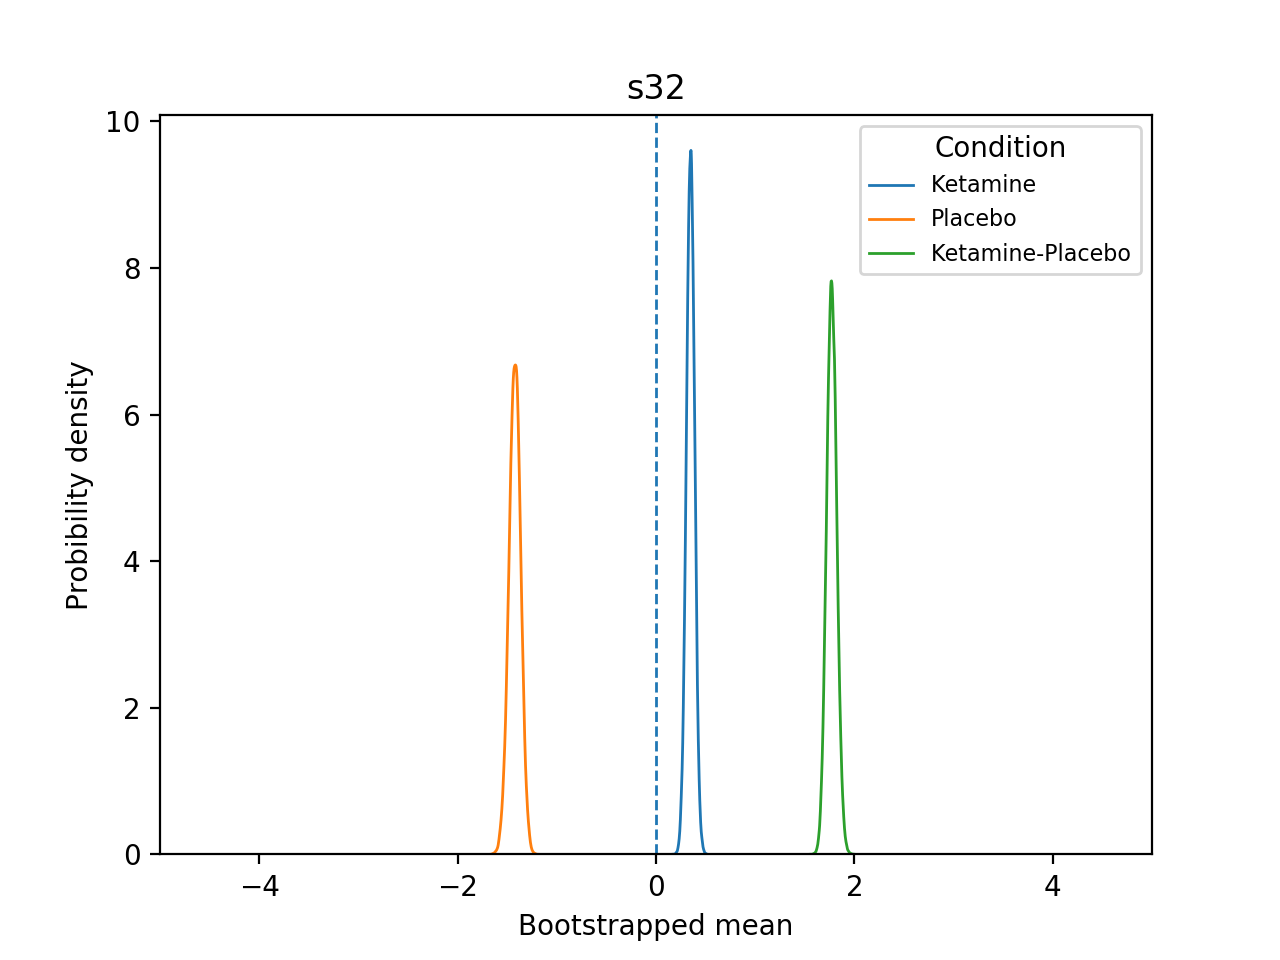

the p-value for Ketamine and placebo is:  0.0


In [116]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('s32')

<IPython.core.display.Javascript object>


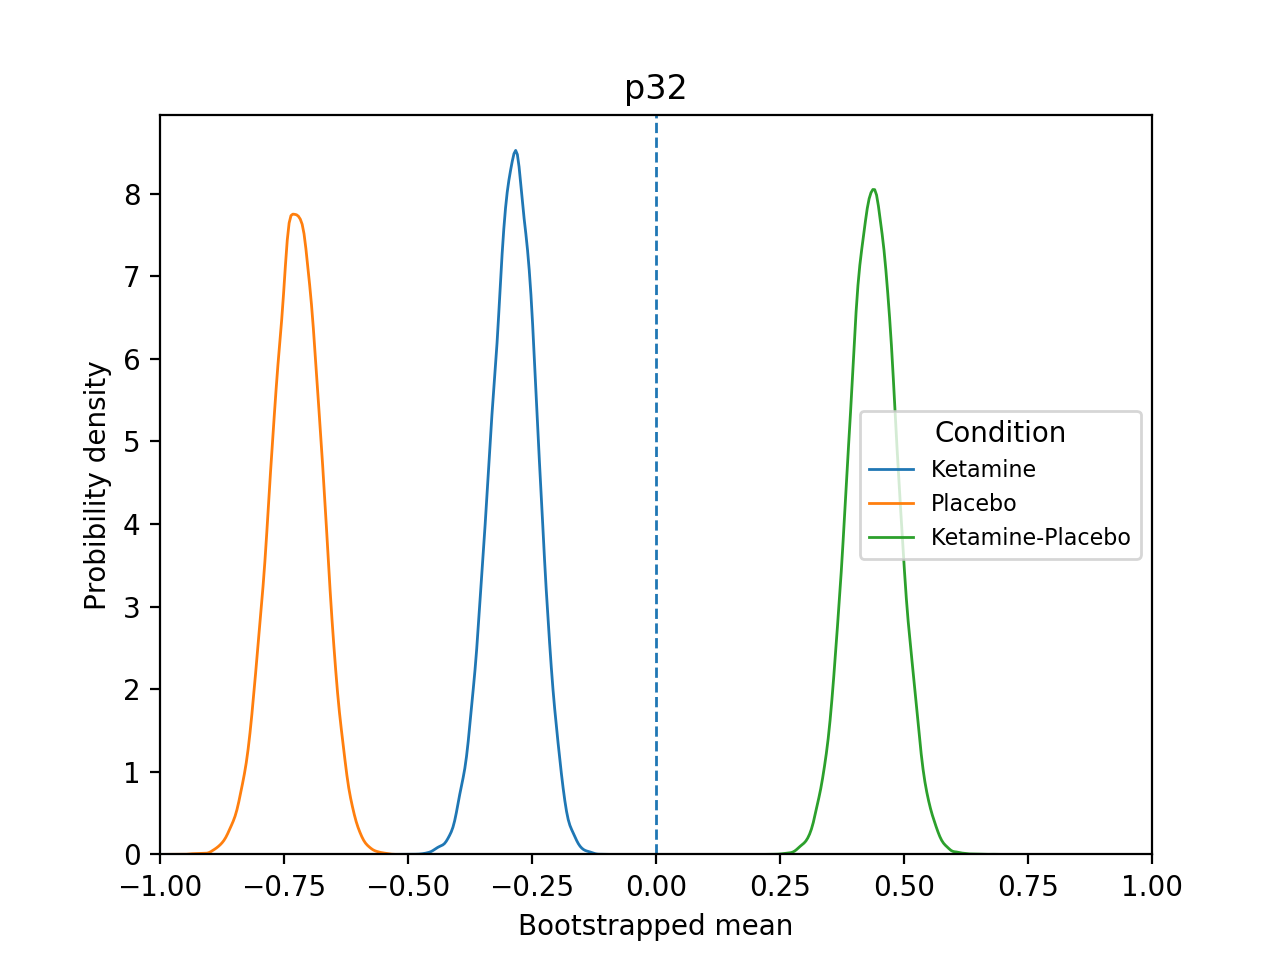

the p-value for Ketamine and placebo is:  0.0


In [79]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('p32')

<IPython.core.display.Javascript object>


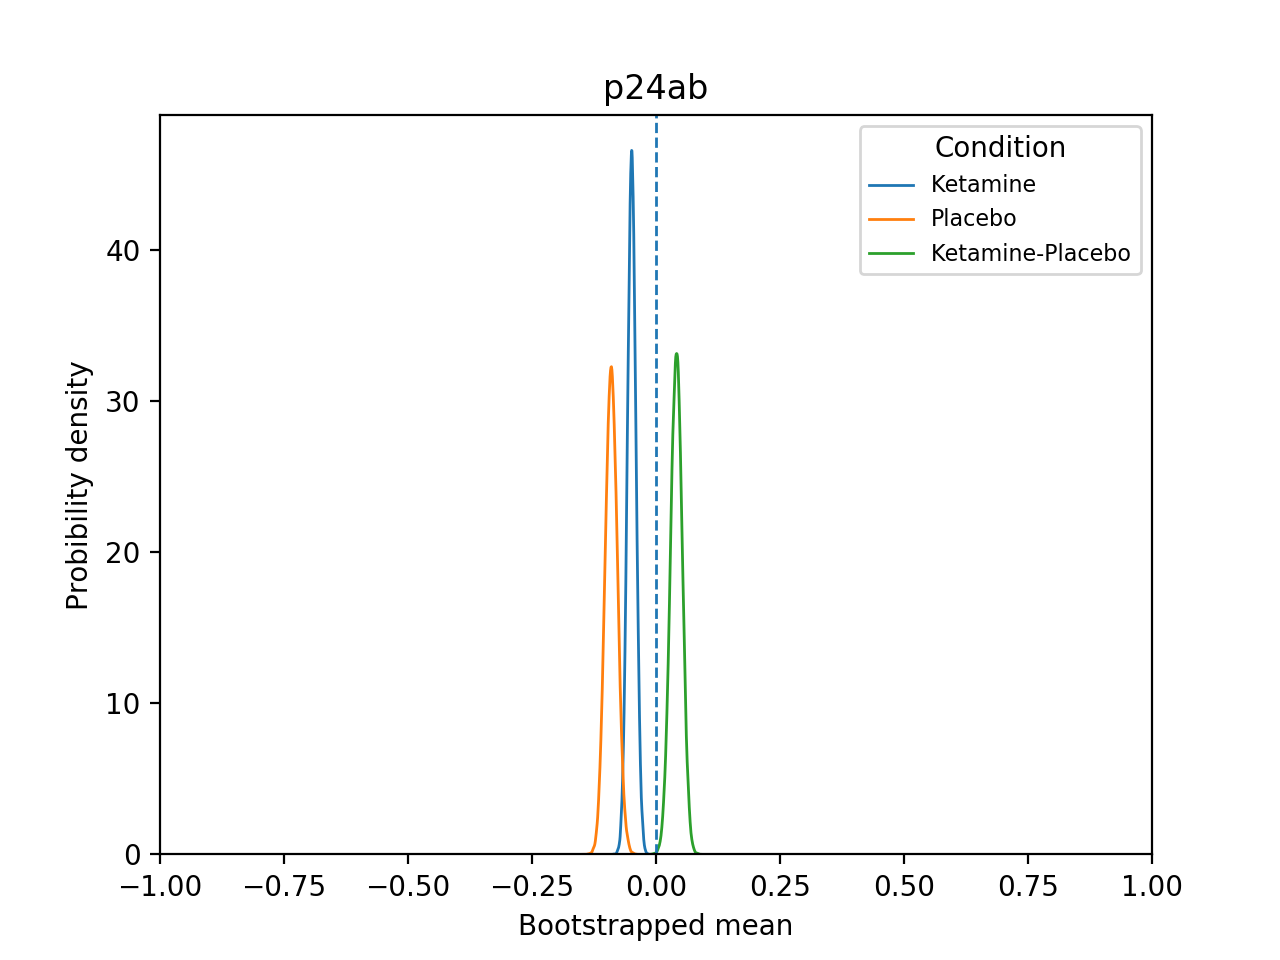

the p-value for Ketamine and placebo is:  0.0


In [82]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('p24ab')

In [ ]:
keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']

<IPython.core.display.Javascript object>


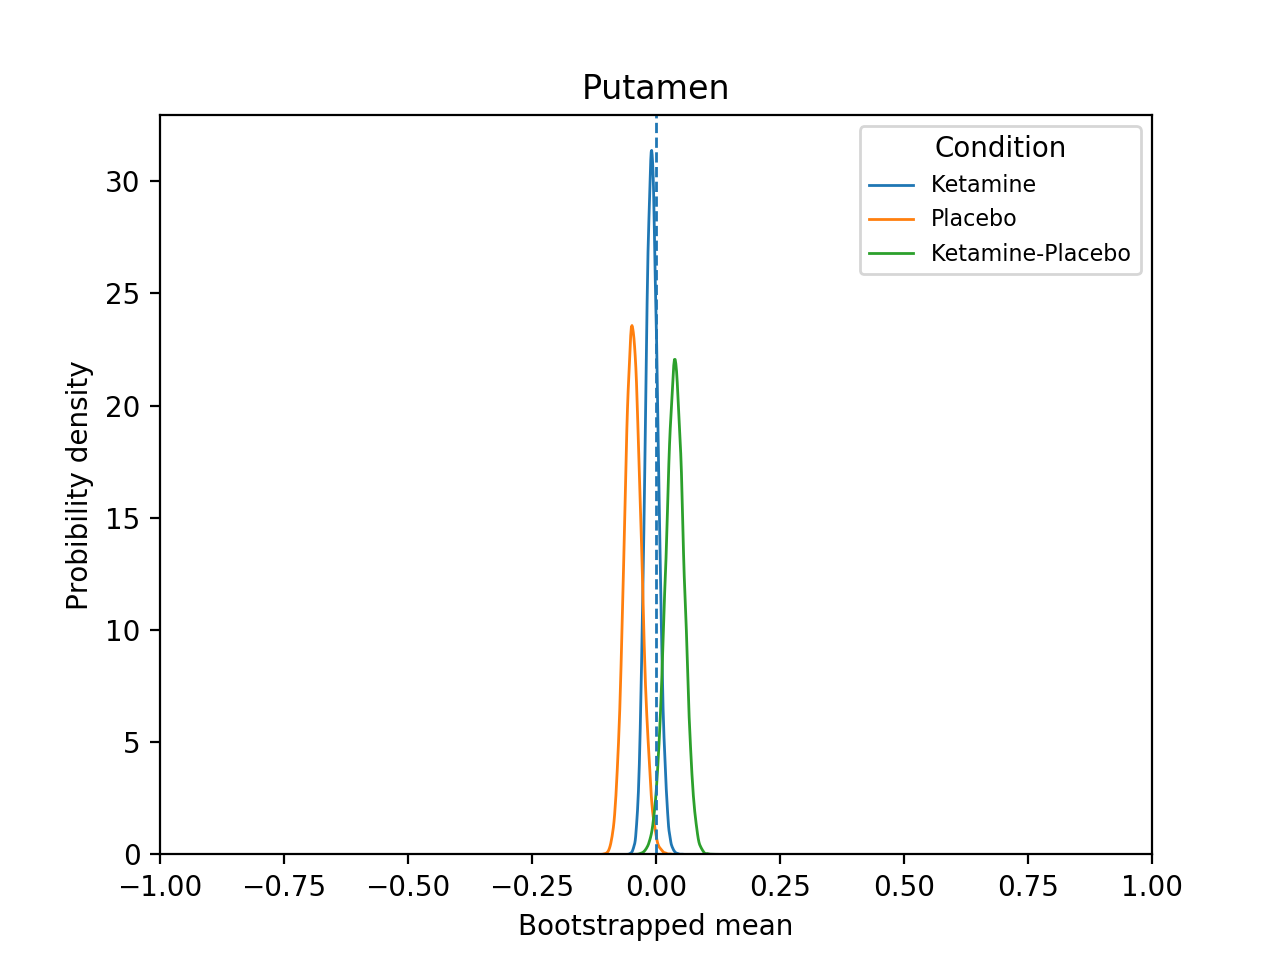

the p-value for Ketamine and placebo is:  0.0


In [90]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('Putamen')

<IPython.core.display.Javascript object>


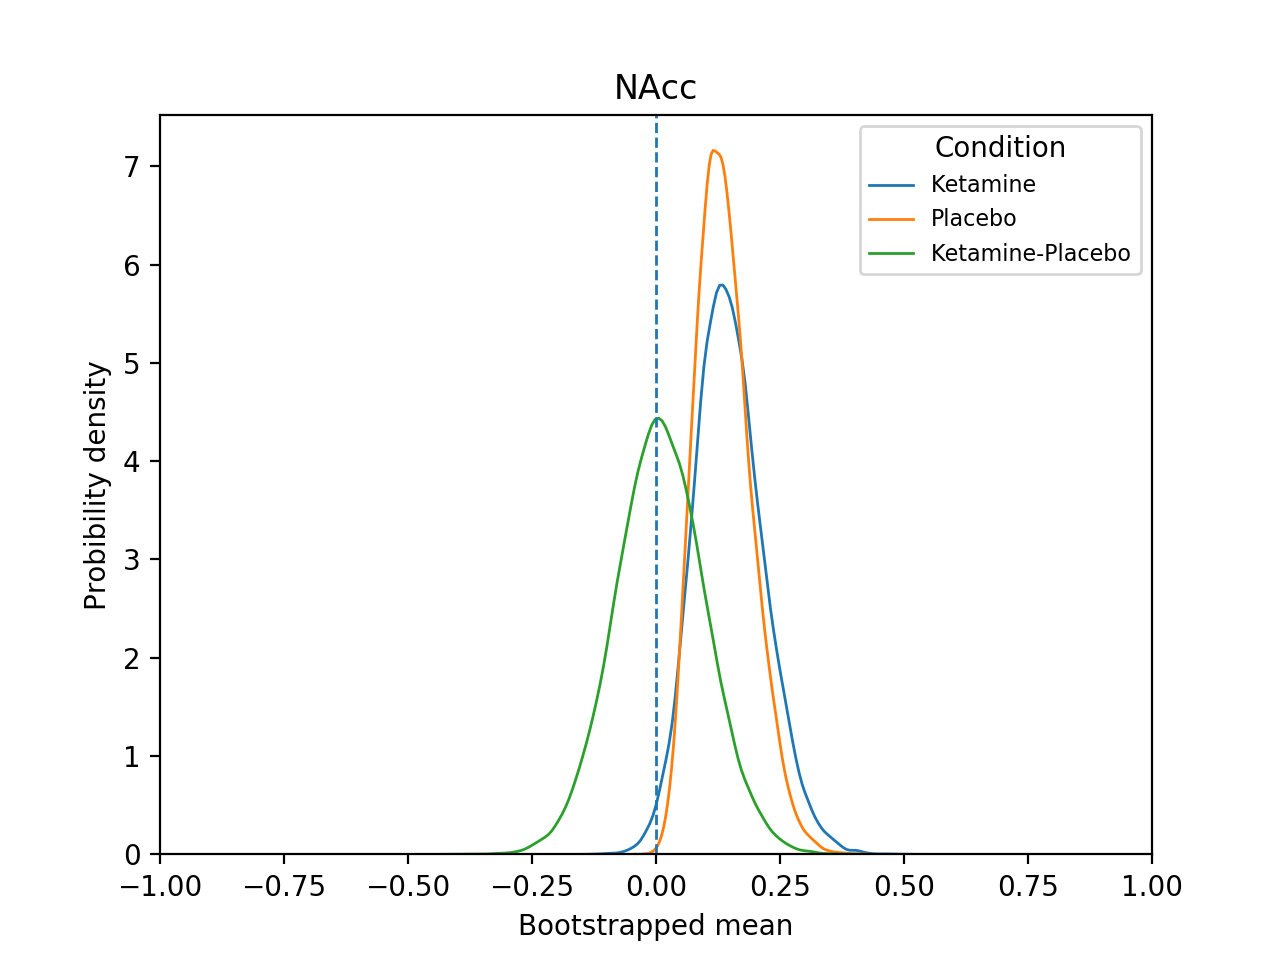

the p-value for Ketamine and placebo is:  6.704994977964205e-145


In [92]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('NAcc')

<IPython.core.display.Javascript object>


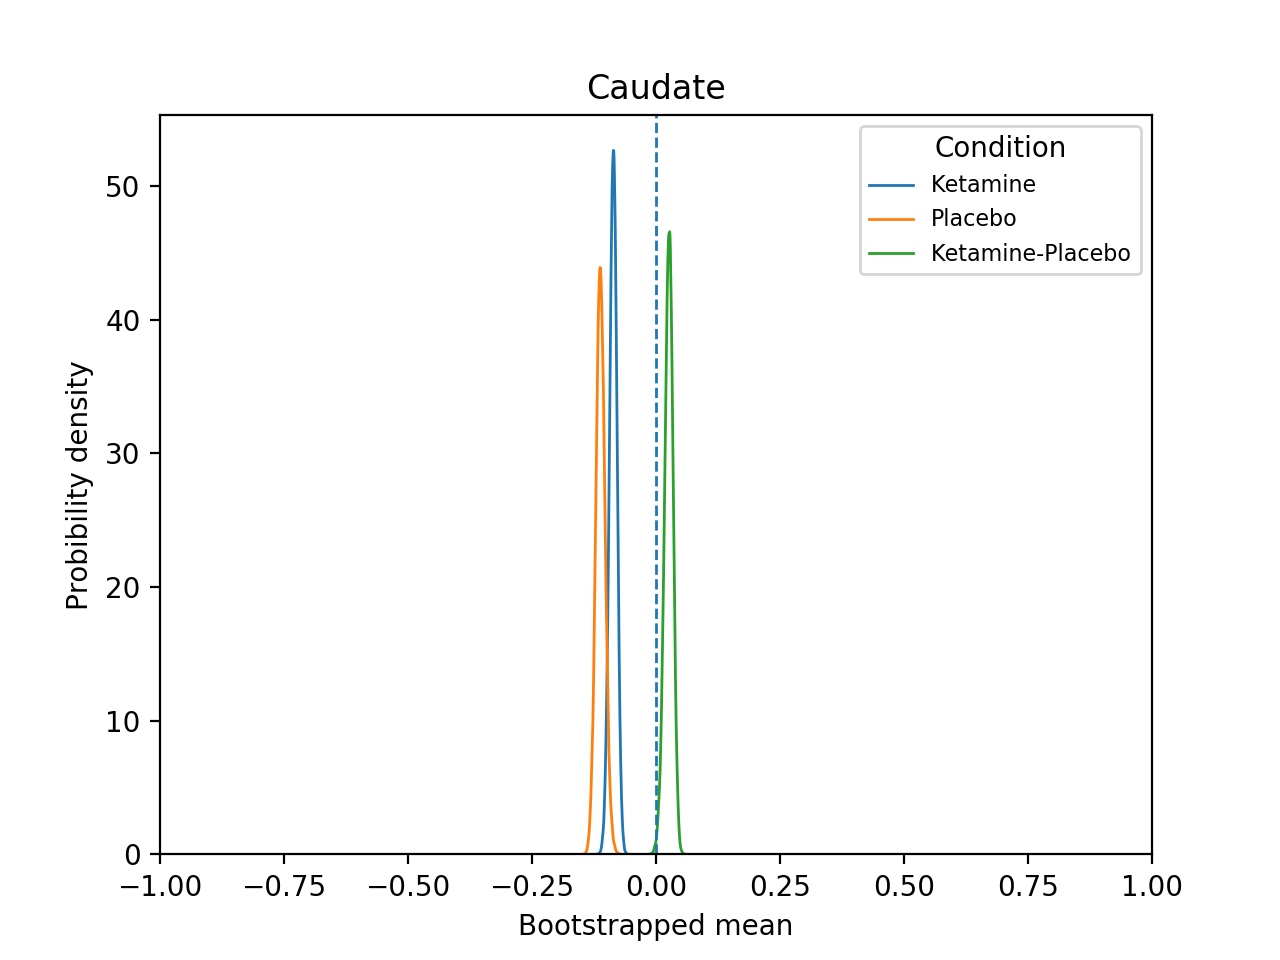

the p-value for Ketamine and placebo is:  0.0


In [93]:
[ofc, bsr_k, bsr_p, bsr] = calculate_bootstrap('Caudate')